## Findings

  In my exploration of implementing a Convolutional Neural Network (CNN) on the CIFAR-10 dataset, I experimented with different hyperparameters to optimize performance.

  I found that increasing the learning rate beyond 0.01 actually caused a decrease in performance. It became apparent that a smaller learning rate is more conducive to better convergence during training.

  Similarly, when I extended the number of epochs beyond 10, I observed diminishing returns and even a decline in performance. 

  I decided that dropout regularization wasn't necessary for my model since it wasn't overfitting. This suggested that the complexity of my model didn't warrant additional regularization techniques.

  Lastly, when I experimented with increasing the number of layers, I didn't observe any improvement in performance. In fact, it seemed that the computational cost and training time associated with deeper networks outweighed any potential benefits.

  In summary, my findings indicate that for my CNN model on the CIFAR-10 dataset, a smaller learning rate, a moderate number of epochs, and a simpler model architecture without dropout regularization or excessive layer depth yield optimal performance.


In [16]:
import torch

import torchvision

from torchvision import transforms

import torch.nn as nn

import torch.optim as optim
from torchvision import datasets
from matplotlib import pyplot as plt

In [2]:
# Define transformations, normalizing and applying random horizontal flips

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [3]:
# Downloading CIFAR-10 training and test dataset

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:02<00:00, 62721961.30it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
#Implementing CNN model

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional layers 
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers 
        self.fc1 = nn.Linear(128 * 4 * 4, 512) 
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)  # 10 classes in CIFAR-10 dataset

        # Activation functions
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Feature extraction
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)

        # Flatten the tensor for fully connected layers
        x = x.view(-1, 128 * 4 * 4)

        # Classification
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        # Softmax activation for class probabilities
        x = self.softmax(x)

        return x


In [10]:
# Hyperparameters
num_epochs = 10
batch_size = 64
learning_rate=0.001

In [11]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


In [12]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
#Training part

for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculating the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print the process every 1000 mini-batches
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloader)}], Loss: {running_loss / 100:.4f}, Accuracy: {(correct / total) * 100:.2f}%")
            running_loss = 0.0

print('Finished Training')

Epoch [1/10], Step [100/782], Loss: 2.2407, Accuracy: 19.59%
Epoch [1/10], Step [200/782], Loss: 2.1435, Accuracy: 25.35%
Epoch [1/10], Step [300/782], Loss: 2.1173, Accuracy: 28.06%
Epoch [1/10], Step [400/782], Loss: 2.0913, Accuracy: 30.07%
Epoch [1/10], Step [500/782], Loss: 2.0838, Accuracy: 31.47%
Epoch [1/10], Step [600/782], Loss: 2.0647, Accuracy: 32.72%
Epoch [1/10], Step [700/782], Loss: 2.0558, Accuracy: 33.71%
Epoch [2/10], Step [100/782], Loss: 2.0299, Accuracy: 42.69%
Epoch [2/10], Step [200/782], Loss: 1.9985, Accuracy: 44.27%
Epoch [2/10], Step [300/782], Loss: 2.0025, Accuracy: 44.58%
Epoch [2/10], Step [400/782], Loss: 1.9947, Accuracy: 44.98%
Epoch [2/10], Step [500/782], Loss: 2.0074, Accuracy: 44.95%
Epoch [2/10], Step [600/782], Loss: 1.9873, Accuracy: 45.26%
Epoch [2/10], Step [700/782], Loss: 1.9599, Accuracy: 45.91%
Epoch [3/10], Step [100/782], Loss: 1.9536, Accuracy: 50.42%
Epoch [3/10], Step [200/782], Loss: 1.9634, Accuracy: 49.87%
Epoch [3/10], Step [300/

In [14]:
#Testing 

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Test Accuracy: 65.31%


In [15]:
#I did not store the loss values in the training sadly and since it takes a lot to train again,
#I created the list below by hand to be able to draw the loss/epoch_num graph to show results.

loss_values =[2.2407, 2.0558, 1.9599, 1.9189, 1.8893, 1.8400, 1.8420, 1.8285, 1.8032, 1.7913, 1.7971]
epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

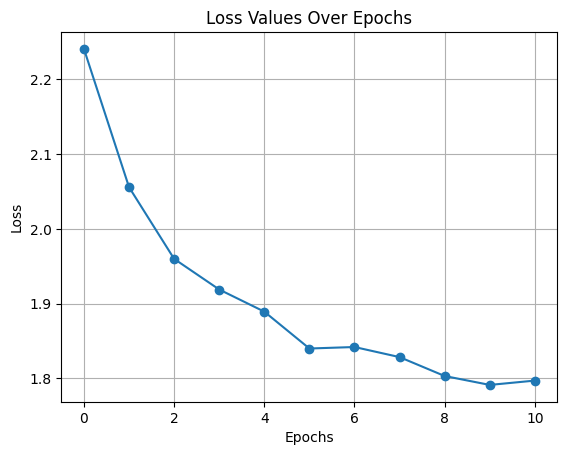

In [17]:
plt.plot(epochs, loss_values, marker='o', linestyle='-')
plt.title('Loss Values Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()